In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Se ajustan los valores *record_date* y *player_name*

In [2]:
record_date = '20230908'

In [3]:
player_name = 'cavo_malena'

In [4]:
PLAYER_HR_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_hr.csv'

In [5]:
hr = pd.read_csv(PLAYER_HR_FILE_DIR,index_col=0)
hr.head()

,seconds,date,hr
10684,"98,302",[2023-09-08 19:20:31 439],80.0
10741,"98,802",[2023-09-08 19:20:31 939],80.0
10799,"99,302",[2023-09-08 19:20:32 439],81.0
10856,"99,802",[2023-09-08 19:20:32 939],82.0
10910,"100,302",[2023-09-08 19:20:33 439],84.0


In [6]:
hr.dtypes

seconds     object
date        object
hr         float64
dtype: object

Se convierte el valor de seconds a un valor númerico

In [7]:
def convert_comma_to_point(value):
    if isinstance(value, str):
        return value.replace(',','.')
    return value

In [8]:
hr['seconds'] = hr['seconds'].apply(lambda x: convert_comma_to_point(x))
hr['seconds'] = hr['seconds'].apply(pd.to_numeric)

Se hace un pequeño estudio

<AxesSubplot:>

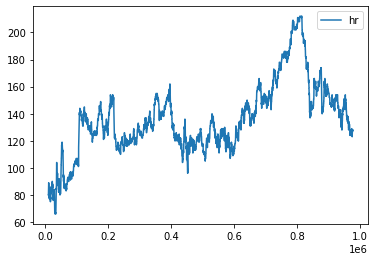

In [9]:
hr.plot(y='hr')

In [10]:
min_seconds = hr['seconds'].min()
max_seconds = hr['seconds'].max()

print(f"Valor mínimo {min_seconds}")
print(f"Valor máximo {max_seconds}")

Valor mínimo 98.302
Valor máximo 8558.556


In [11]:
minutes = (max_seconds - min_seconds) / 60
hours = minutes / 60
print(f"Minutos totales: {minutes} minutos")
print(f"Horas totales: {hours} horas")

Minutos totales: 141.00423333333336 minutos
Horas totales: 2.350070555555556 horas


La frecuencia de la variable HR es de 0.5 segundos, es decir, cada medio segundo, se recoge el ritmo cardíaco de la jugada. Se va a comprobar que esto se cumple.

In [12]:
hr['seconds'].diff()

10684     NaN
10741     0.5
10799     0.5
10856     0.5
10910     0.5
         ... 
976599    0.5
976656    0.5
976712    0.5
976767    0.5
976823    0.5
Name: seconds, Length: 16794, dtype: float64

In [13]:
hr['seconds'].diff().unique()

array([  nan, 0.5  , 0.5  , 0.5  , 3.5  , 2.5  , 9.5  , 7.   , 4.5  ,
       0.5  , 6.5  , 5.5  , 4.   , 2.   , 0.5  , 0.5  , 0.499, 0.498,
       0.499, 0.468, 0.535, 0.501, 0.503, 0.503, 0.502, 0.501, 0.472,
       0.532, 0.502, 0.464, 0.537, 0.506, 0.498, 0.496, 0.497, 0.497,
       0.504, 0.504, 0.466, 0.532, 0.469, 0.529, 0.495, 0.465, 0.536,
       0.495, 0.485, 0.511, 0.463, 0.533, 0.505, 0.505, 0.507, 0.493,
       0.457, 0.545, 0.462, 0.539, 0.461, 0.537, 0.471, 0.531, 0.473,
       0.527, 0.507, 0.46 , 0.535, 0.408, 0.595, 0.496, 0.494, 0.472,
       0.53 , 0.508, 0.492, 0.506, 0.491, 0.51 , 0.488, 0.454, 0.546,
       0.382, 0.618, 3.001, 4.999, 5.001, 2.999, 0.508, 0.47 , 0.528,
       0.47 , 0.501, 0.498, 0.502, 0.499, 0.503, 0.496, 0.497, 0.504,
       0.531, 0.469, 0.531])

In [14]:
hr['diff'] = hr['seconds'].diff()

In [15]:
hr.pivot_table(columns=['diff'], aggfunc='size')

diff
0.382    1
0.408    1
0.454    1
0.457    1
0.460    1
        ..
5.001    1
5.500    1
6.500    1
7.000    1
9.500    1
Length: 101, dtype: int64

Se interpolan los datos

In [16]:
new_df = pd.DataFrame()

In [17]:
last = hr.iloc[0]
for i in range(1, hr.shape[0]):
    new_df = new_df.append(last)
    # si valor actual tiene diff mayor que 0.5, generar números
    
    if hr.iloc[i]['diff'] > 0.5:
        seconds = last['seconds']
        value = (hr.iloc[i]['hr'] + last['hr'])/ 2
        #print(hr.iloc[i]['hr'], last['hr'], value)
        #print(last, hr.iloc[i])
        for x in range(0, int(hr.iloc[i]['diff']/0.5) -1):
            
            seconds = seconds + 0.5
            new_df = new_df.append({'seconds': seconds, 'date': None, 'hr': value},ignore_index=True)
    last = hr.iloc[i]


In [18]:
new_df

,seconds,date,hr,diff
0,98.302,[2023-09-08 19:20:31 439],80.0,NaN
1,98.802,[2023-09-08 19:20:31 939],80.0,0.5
2,99.302,[2023-09-08 19:20:32 439],81.0,0.5
3,99.802,[2023-09-08 19:20:32 939],82.0,0.5
4,100.302,[2023-09-08 19:20:33 439],84.0,0.5
...,...,...,...,...
976542,8556.056,[2023-09-08 21:41:29 193],128.0,0.5
976599,8556.556,[2023-09-08 21:41:29 693],128.0,0.5
976656,8557.056,[2023-09-08 21:41:30 193],128.0,0.5
976712,8557.556,[2023-09-08 21:41:30 693],128.0,0.5


In [19]:
new_df.to_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_hr_without_gaps.csv')

# Ahora hacer lo mismo con activity

In [20]:
PLAYER_ACTIVITY_FILE_DIR = f'../../../../datasets/study-players/{record_date}/{player_name}_activity_load.csv'

In [21]:
activity_load = pd.read_csv(PLAYER_ACTIVITY_FILE_DIR,index_col=0)
activity_load.head()

,seconds,date,activity_load_2d,activity_load_3d
72,"1,765",[2023-09-08 19:18:54 902],"0,005","0,0055"
181,"2,765",[2023-09-08 19:18:55 902],"0,0019","0,0022"
291,"3,765",[2023-09-08 19:18:56 902],"0,0022","0,0025"
402,"4,765",[2023-09-08 19:18:57 902],"0,002","0,0023"
513,"5,765",[2023-09-08 19:18:58 902],"0,0022","0,0025"


Se debe cambiar los valores numéricos a las cargas de actividad y a los segundos

In [22]:
activity_load['seconds'] = activity_load['seconds'].apply(lambda x: convert_comma_to_point(x))
activity_load['seconds'] = activity_load['seconds'].apply(pd.to_numeric)

In [23]:
activity_load['activity_load_2d'] = activity_load['activity_load_2d'].apply(lambda x: convert_comma_to_point(x))
activity_load['activity_load_2d'] = activity_load['activity_load_2d'].apply(pd.to_numeric)

In [24]:
activity_load['activity_load_3d'] = activity_load['activity_load_3d'].apply(lambda x: convert_comma_to_point(x))
activity_load['activity_load_3d'] = activity_load['activity_load_3d'].apply(pd.to_numeric)

In [25]:
activity_load.dtypes

seconds             float64
date                 object
activity_load_2d    float64
activity_load_3d    float64
dtype: object

Se muestran unos gráficos

<AxesSubplot:>

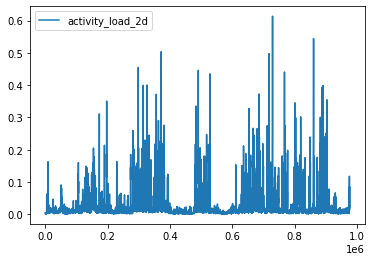

In [26]:
activity_load.plot(y='activity_load_2d')

<AxesSubplot:>

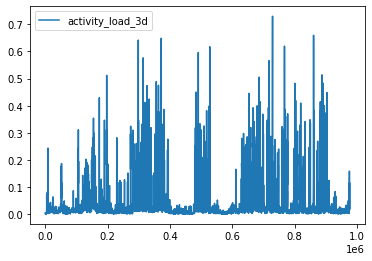

In [27]:
activity_load.plot(y='activity_load_3d')

In [28]:
min_seconds = activity_load['seconds'].min()
max_seconds = activity_load['seconds'].max()

print(f"Valor mínimo {min_seconds}")
print(f"Valor máximo {max_seconds}")

Valor mínimo 1.765
Valor máximo 8559.447


In [29]:
minutes = (max_seconds - min_seconds) / 60
hours = minutes / 60
print(f"Minutos totales: {minutes} minutos")
print(f"Horas totales: {hours} horas")

Minutos totales: 142.62803333333335 minutos
Horas totales: 2.3771338888888893 horas


Se cuenta con más info de la carga de actividad

Se comprueban los gaps, frecuencia de un segundoactivity_load['seconds'].diff()

In [30]:
activity_load['seconds'].diff()

72        NaN
181       1.0
291       1.0
402       1.0
513       1.0
         ... 
976473    1.0
976587    1.0
976699    1.0
976810    1.0
976921    1.0
Name: seconds, Length: 8536, dtype: float64

In [31]:
activity_load['seconds'].diff().unique()

array([  nan, 1.   , 1.   , 1.   , 1.   , 1.155, 1.162, 1.161, 1.162,
       1.   , 1.162, 1.162, 1.16 , 1.   , 1.161, 1.161, 1.163, 1.16 ,
       1.   , 1.161, 1.16 , 1.172, 1.151, 1.162, 1.162, 1.16 , 1.161,
       1.16 , 1.162, 0.997, 0.967, 1.194, 1.002, 0.999, 0.997, 1.002,
       0.998, 1.001, 1.001, 0.998, 0.971, 1.032, 0.963, 1.037, 0.999,
       1.005, 0.996, 1.005, 1.003, 1.003, 1.004, 1.032, 0.97 , 1.029,
       1.16 , 0.969, 1.033, 1.163, 0.964, 1.038, 1.163, 0.985, 1.012,
       0.962, 1.035, 1.164, 0.968, 0.995, 0.994, 1.007, 0.993, 0.957,
       1.045, 1.039, 0.962, 0.996, 1.004, 1.031, 1.164, 0.973, 1.026,
       1.159, 1.007, 0.96 , 1.036, 0.908, 1.096, 1.159, 0.972, 1.03 ,
       1.03 , 1.185, 1.143, 1.008, 1.008, 1.006, 1.167, 0.991, 1.01 ,
       0.987, 1.157, 0.954, 0.883, 1.117, 1.006, 0.971, 1.028, 0.998,
       1.001, 0.998, 1.157, 1.002, 0.997, 0.999, 1.004, 0.969, 1.003,
       0.996, 1.163])

No hay gaps significativos, no hay que hacer cambios, se guarda el dataset.

In [32]:
activity_load.to_csv(f'../../../../datasets/study-players/{record_date}/{player_name}_activity_load.csv')